In [62]:
import numpy as np
import pandas as pd
import tqdm
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from collections import Counter

In [119]:
raw_data = pd.read_csv("/opt/ml/input/data/FE.csv").sort_values("userID")
user_info = raw_data.pivot_table("KnowledgeTag","userID","assessmentItemID").fillna(0).sort_values("userID")
user_id = raw_data["userID"].unique()

In [ ]:
user_info[1]

100%|██████████| 6698/6698 [00:31<00:00, 215.73it/s]


In [131]:
##----------K Means Clustering-------------
n_clusters = 15
model = KMeans(n_clusters=n_clusters).fit(user_info_np) # TODO : n_clusters 설정
label = list(model.labels_) # 각 유저의 레이블 확인 

In [113]:
##-----------TSNE Projection----------------
tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=100, n_iter=5000, n_iter_without_progress=100, learning_rate=200) # n_componenets : 결과 data point의 차원
result = tsne.fit_transform(user_info)

/opt/conda/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [132]:
unique_label = list(range(n_clusters))
point_label_dict = dict()
for ul in tqdm.tqdm(unique_label) :
    point_label_dict[ul] = [[] for _ in range(3)]
    for r, l in zip(result, label) :
        if l == ul :
            point_label_dict[ul][0].append(r[0])
            point_label_dict[ul][1].append(r[1])


100%|██████████| 15/15 [00:00<00:00, 77.64it/s]


In [136]:
selected_labels = list(range(15)) # 시각화하고 싶은 레이블을 선택

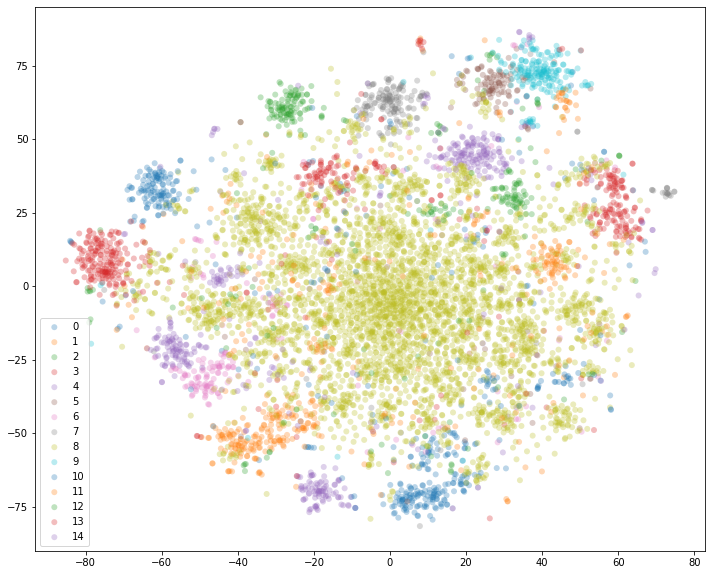

In [137]:
n=6000
fig, ax = plt.subplots(figsize=(12,10))
#ax = plt.scatter(result[:n,0],result[:n,1], c=label[:n], alpha=0.5)
for l in selected_labels :
    x, y = point_label_dict[l][0], point_label_dict[l][1]
    ax.scatter(x, y, cmap="viridis", label=l,
               alpha=0.3, edgecolors='none')
ax.legend()
plt.show()